<a href="https://colab.research.google.com/github/ishita48/S49200_Machine_Learning_Assignment/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Extra   503 non-null    float64
 1   Total   904 non-null    float64
dtypes: float64(2)
memory usage: 14.3 KB


None

,Extra,Total
0,0.1,24.333333
1,NaN,69.033333
2,0.1,86.991667
3,NaN,82.900000
4,NaN,60.383333


Q1: Number of students who reported extra credit: 503
Q2: Mean, Min, Max of Extra Credit: 0.7976540755467197 0.1 5.0
Q3: Percentage of students reporting ≤1 extra credit: 73.95626242544732
Q4: Correlation Coefficient: 0.18706068470027773 (Positive)


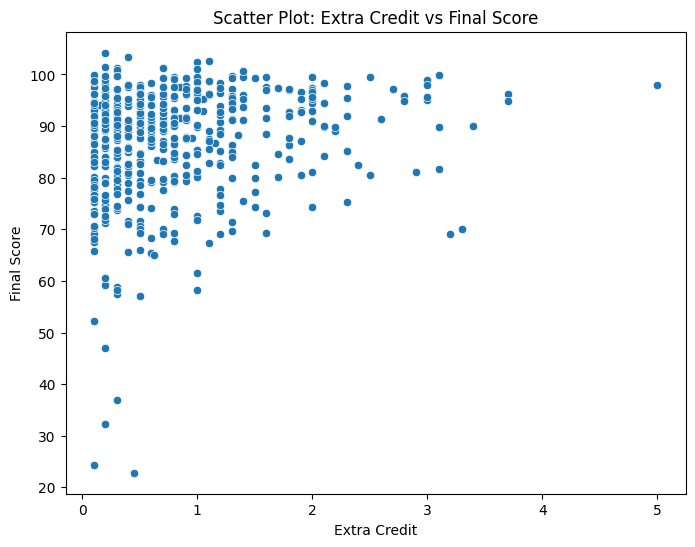

Q6: Linear Regression Equation: y = 2.7867x + 84.5402
Q7: RMSE: 10.711492451359439


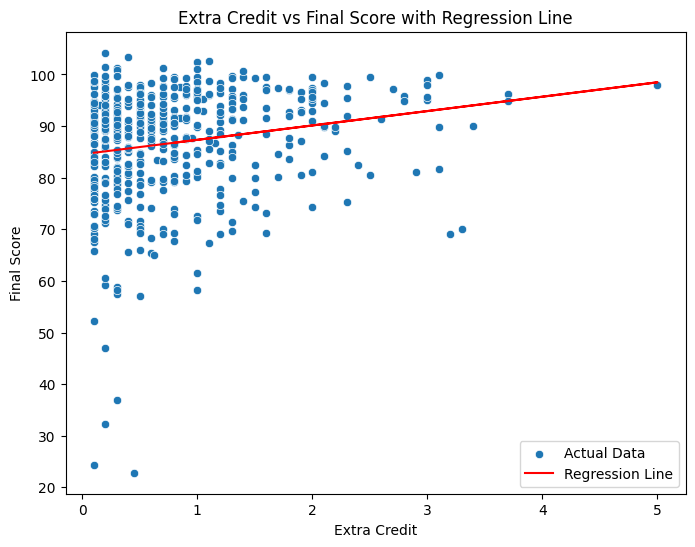

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
file_path = "extra_credits_dataset.xlsx"
df = pd.read_excel(file_path)

# Display basic information
display(df.info())
display(df.head())

# Q1: Count students who reported extra credit
reported_count = df['Extra'].count()
print("Q1: Number of students who reported extra credit:", reported_count)

# Q2: Compute mean, min, max of extra credit
mean_extra = df['Extra'].mean()
min_extra = df['Extra'].min()
max_extra = df['Extra'].max()
print("Q2: Mean, Min, Max of Extra Credit:", mean_extra, min_extra, max_extra)

# Q3: Percentage of students who reported ≤1 extra credit
percentage = (df[df['Extra'] <= 1].shape[0] / reported_count) * 100
print("Q3: Percentage of students reporting ≤1 extra credit:", percentage)

# Q4: Correlation coefficient between extra credits and final score
correlation = df[['Extra', 'Total']].corr().iloc[0,1]
correlation_type = "Positive" if correlation > 0 else "Negative"
print(f"Q4: Correlation Coefficient: {correlation} ({correlation_type})")

# Q5: Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Extra'], y=df['Total'])
plt.xlabel("Extra Credit")
plt.ylabel("Final Score")
plt.title("Scatter Plot: Extra Credit vs Final Score")
plt.show()

# Filter out missing values for regression
df_clean = df.dropna()
X = df_clean[['Extra']]
y = df_clean['Total']

# Q6: Train linear regression model
model = LinearRegression()
model.fit(X, y)
intercept, slope = model.intercept_, model.coef_[0]
print(f"Q6: Linear Regression Equation: y = {slope:.4f}x + {intercept:.4f}")

# Q7: Compute RMSE
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("Q7: RMSE:", rmse)

# Q8: Scatter plot + regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_clean['Extra'], y=df_clean['Total'], label="Actual Data")
plt.plot(df_clean['Extra'], y_pred, color='red', label="Regression Line")
plt.xlabel("Extra Credit")
plt.ylabel("Final Score")
plt.title("Extra Credit vs Final Score with Regression Line")
plt.legend()
plt.show()
